# Crime Rate prediction by twitter Data Analysis

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

# Enter Twitter API Keys
access_token = "1100458211503534080-UwtTzEQQ84s6ECX3ViHeP2netlk3Ak"
access_token_secret = "EGEg0i8x8MEbB32CyUSdKqA2WklSkVxxP9ukpHBarueE6"
consumer_key = "6ToB5QaSEZAEaR8QubPAb2a2V"
consumer_secret = "cIexzStoKSkZIvyLN789n0dekULX3zYODScW2aAoNziFrFBVRM"

# Create the class that will handle the tweet stream
# Create tracklist with the words that will be searched for
tracklist = ["#Murder in Los Angeles", "#Killing in los Angeles", "#Rape in los Angeles","#crime in los angeles","#kidnapping in los angeles","#Smuggling","#Fighting","#Robbery","#Police", "#Law", "#Criminal"]
tweet_count = 0
# Input number of tweets to be downloaded
n_tweets = 30000

# Create the class that will handle the tweet stream
class StdOutListener(StreamListener):
      
    def on_data(self, data):
        global tweet_count
        global n_tweets
        global stream
        
        if tweet_count < n_tweets:
            print(data)
            tweet_count += 1
            saveFile=open('new.json', 'a')
            saveFile.write(data)
            saveFile.write('\n')
            saveFile.close()
            return True
        else:
            stream.disconnect()

    def on_error(self, status):
        print(status)



# Handles Twitter authetification and the connection to Twitter Streaming API
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)
stream.filter(track=tracklist)             
stream.filter (coordinates = ['Los Angeles']['33.55:-119.085:34.084:-117.87']['33.55,-117.87'])

In [14]:
import json
import pandas as pd
tweets_data_path = "new (1).json"  
tweets_data = []  
tweets_file = open(tweets_data_path, "r")  
for line in tweets_file:  
    try:  
        tweet = json.loads(line)  
        tweets_data.append(tweet)
    except:  
        continue


# Tweets Data Analysis

In [15]:
tweets_data[0]

{'created_at': 'Wed Sep 25 19:48:19 +0000 2019',
 'id': 1176946554059591680,
 'id_str': '1176946554059591680',
 'text': 'RT @DessaigneLamber: "Je réfute totalement le terme de violences policières, bonne dérouillée est plus approprié" Par Brigitte Jullien\n\n#Br…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4355116342,
  'id_str': '4355116342',
  'name': 'Rafael de Almodovar- M°3191',
  'screen_name': 'Rafael5e',
  'location': "Val-d'Oise, Ile-de-France",
  'url': None,
  'description': "J'assume mes idées. Athée.\nRetraité volé par LREM.\nContre toutes les violences ..! \nAdepte du vote blanc et contre la manipulation du vote de barrage.",
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count':

In [16]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['favorited']=list(map(lambda tweet: tweet['favorited'], tweets_data))
tweets['retweeted']=list(map(lambda tweet: tweet['retweeted'], tweets_data))
tweets.tail()

,text,Username,Timestamp,favorited,retweeted
376,RT @BlackSheep_000: #BalanceTonFlic\n#Converge...,LoudL,Wed Sep 25 22:56:39 +0000 2019,False,False
377,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,ToriTrevillian,Wed Sep 25 22:56:41 +0000 2019,False,False
378,"Empatía cero con los inquisidores (gendarmes, ...",javiermirandalu,Wed Sep 25 22:56:47 +0000 2019,False,False
379,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,mare1173,Wed Sep 25 22:56:48 +0000 2019,False,False
380,RT @diogene2607: ça commence à flipper du côté...,wysifox,Wed Sep 25 22:56:49 +0000 2019,False,False


In [17]:
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

In [18]:
#Error codes from the Twitter API can be inside the .txt document, #take them off
tweets_data = [x for x in tweets_data if not isinstance(x, int)]


In [ ]:
print("The total number of Tweets is:",len(tweets_data))

In [19]:
#Create a function to see if the tweet is a retweet
def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True

In [10]:
#Create a function to see if the tweet is a reply to a tweet of #another user, if so return said user. 
def is_Reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']

In [12]:
#Create function for taking the most used Tweet sources off the #source column 
def reckondevice(tweet):
    if 'iPhone' in tweet['source'] or ('iOS' in tweet['source']):
        return 'iPhone'
    elif 'Android' in tweet['source']:
        return 'Android'
    elif 'Mobile' in tweet['source'] or ('App' in tweet['source']):
        return 'Mobile device'
    elif 'Mac' in tweet['source']:
        return 'Mac'
    elif 'Windows' in tweet['source']:
        return 'Windows'
    elif 'Bot' in tweet['source']:
        return 'Bot'
    elif 'Web' in tweet['source']:
        return 'Web'
    elif 'Instagram' in tweet['source']:
        return 'Instagram'
    elif 'Blackberry' in tweet['source']:
        return 'Blackberry'
    elif 'iPad' in tweet['source']:
        return 'iPad'
    elif 'Foursquare' in tweet['source']:
        return 'Foursquare'
    else:
        return '-'

In [13]:
#Convert the Tweet JSON data to a pandas Dataframe, and take the #desired fields from the JSON. More could be added if needed.
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['lenght'] = list(map(lambda tweet: len(tweet['text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']) , tweets_data))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tweets['device'] = list(map(reckondevice, tweets_data))
tweets['RT'] = list(map(is_RT, tweets_data))
tweets['Reply'] = list(map(is_Reply_to, tweets_data))

NameError: name 'tweets_data' is not defined

In [17]:
tweets.head()


,text,Username,Timestamp,lenght,location,device,RT,Reply
0,"RT @DessaigneLamber: ""Je réfute totalement le ...",Rafael5e,Wed Sep 25 19:48:19 +0000 2019,140,"Val-d'Oise, Ile-de-France",Android,True,None
1,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,kim_binderk19,Wed Sep 25 19:48:21 +0000 2019,140,None,Android,True,None
2,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,Next_Case,Wed Sep 25 19:48:24 +0000 2019,140,Las Vegas,iPhone,True,None
3,RT @InderjitkaurALS: #DomesticViolence is a se...,rajeshgodiya1,Wed Sep 25 19:48:24 +0000 2019,140,None,Mobile device,True,None
4,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,lynette530,Wed Sep 25 19:48:26 +0000 2019,140,California,Web,True,None


In [18]:
#See the percentage of tweets from the initial set that are #retweets:
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 79% of all the tweets


In [19]:
RT_tweets.head()


,text,Username,Timestamp,lenght,location,device,RT,Reply
0,"RT @DessaigneLamber: ""Je réfute totalement le ...",Rafael5e,Wed Sep 25 19:48:19 +0000 2019,140,"Val-d'Oise, Ile-de-France",Android,True,None
1,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,kim_binderk19,Wed Sep 25 19:48:21 +0000 2019,140,None,Android,True,None
2,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,Next_Case,Wed Sep 25 19:48:24 +0000 2019,140,Las Vegas,iPhone,True,None
3,RT @InderjitkaurALS: #DomesticViolence is a se...,rajeshgodiya1,Wed Sep 25 19:48:24 +0000 2019,140,None,Mobile device,True,None
4,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,lynette530,Wed Sep 25 19:48:26 +0000 2019,140,California,Web,True,None


In [20]:
def reckondevice(tweet):
    if 'Murder' in tweet['source'] or ('Kill' in tweet['source']) :
        return 'crime'
    else:
        return '-'


In [21]:
RT_tweets.head()


,text,Username,Timestamp,lenght,location,device,RT,Reply
0,"RT @DessaigneLamber: ""Je réfute totalement le ...",Rafael5e,Wed Sep 25 19:48:19 +0000 2019,140,"Val-d'Oise, Ile-de-France",Android,True,None
1,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,kim_binderk19,Wed Sep 25 19:48:21 +0000 2019,140,None,Android,True,None
2,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,Next_Case,Wed Sep 25 19:48:24 +0000 2019,140,Las Vegas,iPhone,True,None
3,RT @InderjitkaurALS: #DomesticViolence is a se...,rajeshgodiya1,Wed Sep 25 19:48:24 +0000 2019,140,None,Mobile device,True,None
4,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,lynette530,Wed Sep 25 19:48:26 +0000 2019,140,California,Web,True,None


In [22]:
#See the percentage of tweets from the initial set that are #retweets:
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 79% of all the tweets


In [23]:
#See the percentage of tweets from the initial set that have #mentions and are not retweets:
mention_tweets = tweets[~tweets['text'].str.contains("RT")  & tweets['text'].str.contains("@")]
print(f"The percentage of retweets is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 8% of all the tweets


In [24]:
#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = tweets[~tweets['text'].str.contains("@")  & ~tweets['text'].str.contains("RT")]
print(f"The percentage of retweets is {round(len(plain_text_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 12% of all the tweets


In [25]:
#See the percentage of tweets from the initial set that are replies #to tweets of another user:
Reply_tweets = tweets[tweets['Reply'].apply(type) == str]
print(f"The percentage of retweets is {round(len(Reply_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 4% of all the tweets


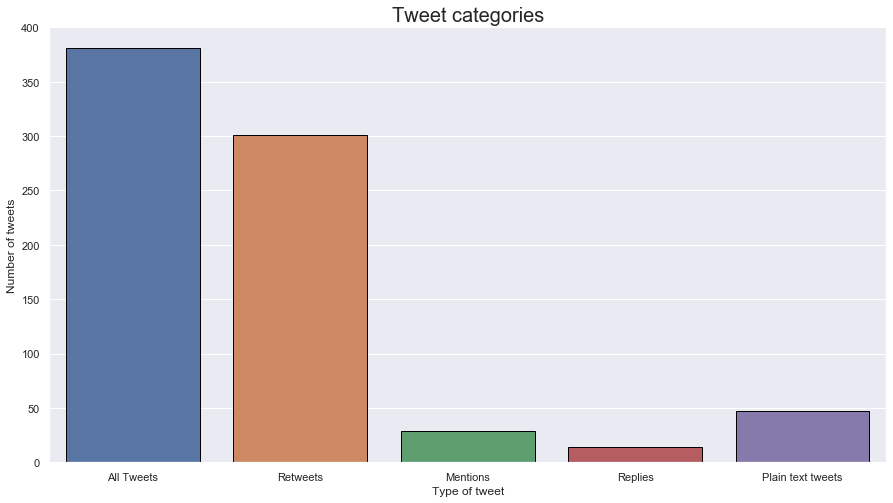

In [26]:
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list = [ len(tweets), len(RT_tweets),len(mention_tweets), len(Reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [27]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [28]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

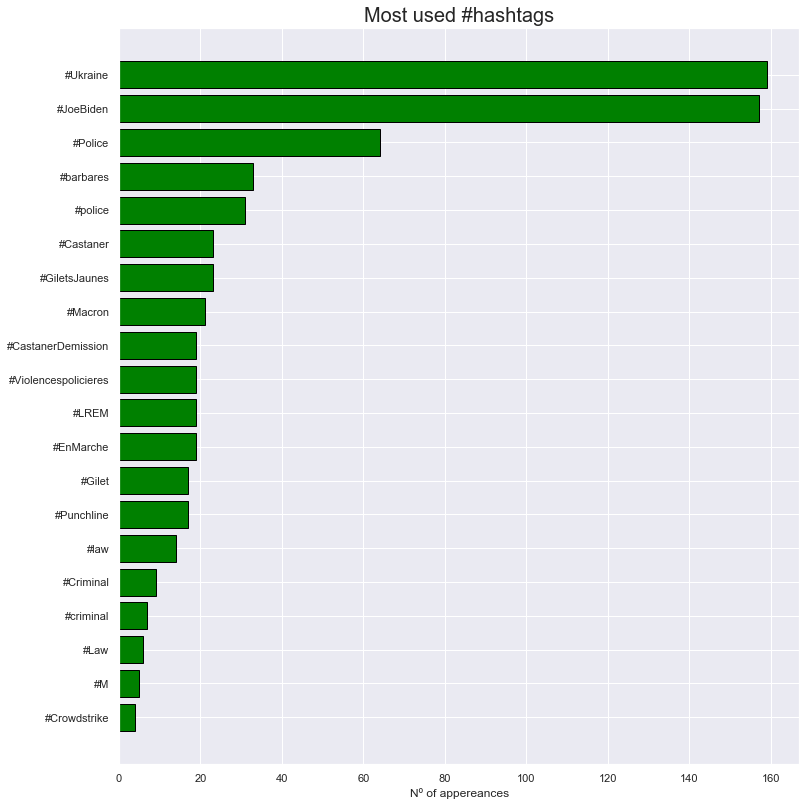

In [29]:
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

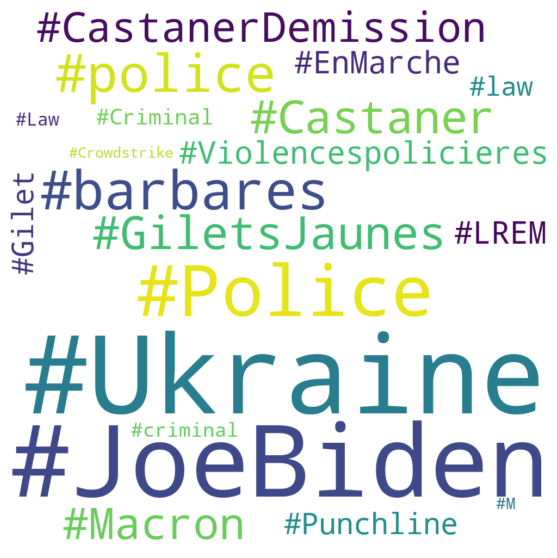

In [30]:
#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()


In [31]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(tweets['text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

In [32]:
#Create an ordered list of tuples with the most mentioned users and #the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

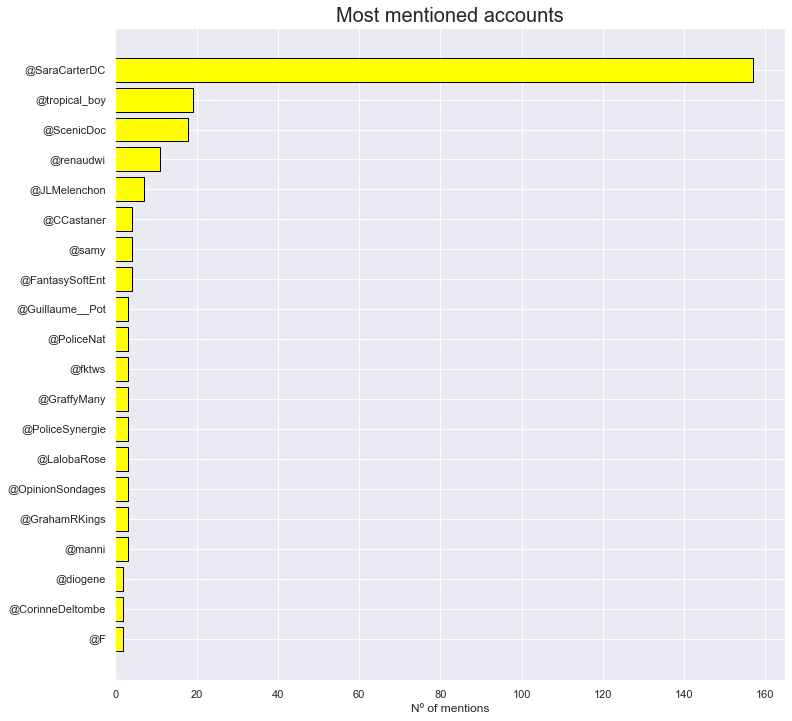

In [33]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()

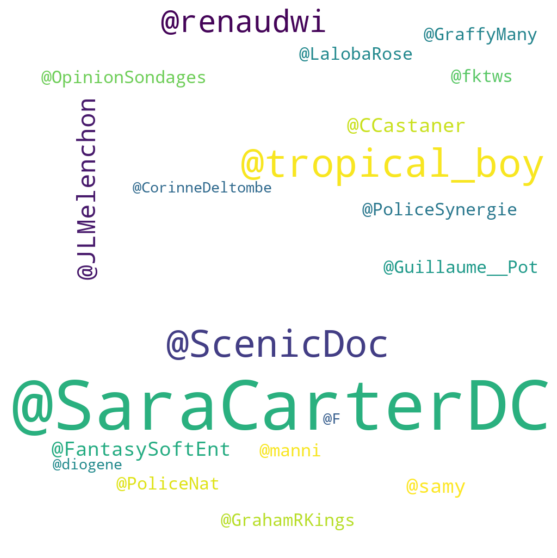

In [34]:
#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

# Tweets Data Preprocessing

# A) Removing Twitter Handles (@user)


In [35]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [36]:
tweets['tidy_tweet'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")

# B) Removing Punctuations, Numbers, and Special Characters


In [38]:
# remove special characters, numbers, punctuations
tweets['tidy_tweet'] = tweets['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

# C) Removing Short Words


In [40]:
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [39]:
tweets

,text,Username,Timestamp,lenght,location,device,RT,Reply,tidy_tweet
0,"RT @DessaigneLamber: ""Je réfute totalement le ...",Rafael5e,Wed Sep 25 19:48:19 +0000 2019,140,"Val-d'Oise, Ile-de-France",Android,True,None,RT Je r fute totalement le terme de violenc...
1,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,kim_binderk19,Wed Sep 25 19:48:21 +0000 2019,140,None,Android,True,None,RT #JoeBiden traveled to #Ukraine and told ...
2,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,Next_Case,Wed Sep 25 19:48:24 +0000 2019,140,Las Vegas,iPhone,True,None,RT #JoeBiden traveled to #Ukraine and told ...
3,RT @InderjitkaurALS: #DomesticViolence is a se...,rajeshgodiya1,Wed Sep 25 19:48:24 +0000 2019,140,None,Mobile device,True,None,RT #DomesticViolence is a serious social iss...
4,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,lynette530,Wed Sep 25 19:48:26 +0000 2019,140,California,Web,True,None,RT #JoeBiden traveled to #Ukraine and told ...
5,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,LessGovtPls,Wed Sep 25 19:48:27 +0000 2019,140,"Washington, USA",iPhone,True,None,RT #JoeBiden traveled to #Ukraine and told ...
6,"She and I share a similarity, Eboni has CH but...",KaelanFaireVA,Wed Sep 25 19:48:27 +0000 2019,226,"Arizona, USA",iPhone,False,KaelanFaireVA,She and I share a similarity Eboni has CH but...
7,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,aaadams_adams,Wed Sep 25 19:48:29 +0000 2019,140,None,iPhone,True,None,RT #JoeBiden traveled to #Ukraine and told ...
8,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,Aliciaanders,Wed Sep 25 19:48:37 +0000 2019,140,None,iPhone,True,None,RT #JoeBiden traveled to #Ukraine and told ...
9,RT @tropical_boy: Voilà...\nTout est dit.\nOn ...,Malou12864151,Wed Sep 25 19:48:40 +0000 2019,140,None,Android,True,None,RT Voil Tout est dit On a compris ...


# D) Tokenization

In [40]:
tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [RT, Je, r, fute, totalement, le, terme, de, v...
1    [RT, #JoeBiden, traveled, to, #Ukraine, and, t...
2    [RT, #JoeBiden, traveled, to, #Ukraine, and, t...
3    [RT, #DomesticViolence, is, a, serious, social...
4    [RT, #JoeBiden, traveled, to, #Ukraine, and, t...
Name: tidy_tweet, dtype: object

# E) Stemming


In [41]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [RT, Je, r, fute, total, le, term, de, violenc...
1    [RT, #joebiden, travel, to, #ukrain, and, told...
2    [RT, #joebiden, travel, to, #ukrain, and, told...
3    [RT, #domesticviol, is, a, seriou, social, iss...
4    [RT, #joebiden, travel, to, #ukrain, and, told...
Name: tidy_tweet, dtype: object

In [42]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets['tidy_tweet'] = tokenized_tweet

In [45]:
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tidy_tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tidy_tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tidy_tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tidy_tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tidy_tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean


In [43]:
all_words = ' '.join([text for text in tweets['tidy_tweet']])

In [44]:
def hashtag_extract(tidy_tweet):
    hashtags = []
    # Loop over the words in the tweet
    for i in tidy_tweet:
        ht = re.findall(r"#", i)
        hashtags.append(ht)

    return hashtags


# Extracting features from cleaned Tweets

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(tweets['text'])
tfidf_vectorizer.get_feature_names()
tfidf_vectorizer.vocabulary_



NameError: name 'tweets' is not defined

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(tweets['text'])

In [47]:
print(bow)

  (0, 262)	1
  (0, 278)	1
  (0, 118)	1
  (0, 42)	1
  (0, 285)	1
  (0, 383)	1
  (0, 204)	1
  (0, 184)	1
  (0, 319)	1
  (1, 181)	1
  (1, 296)	1
  (1, 105)	1
  (1, 290)	1
  (1, 360)	1
  (1, 373)	1
  (1, 364)	1
  (1, 187)	1
  (1, 326)	1
  (1, 319)	1
  (2, 181)	1
  (2, 296)	1
  (2, 105)	1
  (2, 290)	1
  (2, 360)	1
  (2, 373)	1
  :	:
  (379, 290)	1
  (379, 360)	1
  (379, 373)	1
  (379, 364)	1
  (379, 187)	1
  (379, 326)	1
  (379, 319)	1
  (380, 259)	1
  (380, 81)	1
  (380, 107)	1
  (380, 292)	1
  (380, 53)	1
  (380, 82)	1
  (380, 134)	1
  (380, 58)	1
  (380, 98)	1
  (380, 183)	1
  (380, 106)	1
  (380, 303)	1
  (380, 403)	1
  (380, 199)	1
  (380, 30)	1
  (380, 205)	1
  (380, 383)	1
  (380, 319)	1


In [7]:
df=pd.read_csv('tweets.csv')

In [8]:
df.isna().sum()

Unnamed: 0      0
text            0
Username        0
Timestamp       0
lenght          0
location      141
device          0
RT              0
Reply         333
tidy_tweet      0
Label           0
dtype: int64

In [9]:
df.tail()

,Unnamed: 0,text,Username,Timestamp,lenght,location,device,RT,Reply,tidy_tweet,Label
341,341,Canadians can download an app to receive infor...,InTime_Soft,Wed Sep 25 20:01:25 +0000 2019,225,"Vancouver, BC",-,False,NaN,canadian download receiv inform whenev childre...,0
342,342,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,cantfoolall,Wed Sep 25 20:01:27 +0000 2019,140,Kansas City,Android,True,NaN,#joebiden travel #ukrain told then presid that...,0
343,343,Yep...straight from the Jackasses mouth! Where...,DonnaJNiles,Wed Sep 25 20:01:29 +0000 2019,113,South Carolina,Mobile device,False,NaN,straight from jackass mouth where crimin inves...,1
344,344,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,willey_pe,Wed Sep 25 20:01:30 +0000 2019,140,"Lubbock, TX",Mobile device,True,NaN,#joebiden travel #ukrain told then presid that...,0
345,345,#6points en - 🙃#priorité aux #piétons #ENGAGÉS...,MSophieKho,Wed Sep 25 20:01:31 +0000 2019,56,"Toulon, VAR 83 France",iPhone,False,NaN,point #priorit ton #engag,0


In [5]:
X=df.drop(['Label', 'Timestamp','Reply', 'tidy_tweet', 'location', 'Unnamed: 0'], axis=1)
y=df['Label']

NameError: name 'df' is not defined

In [52]:
X.describe(include=["O"])

,text,Username,device
count,346,346,346
unique,133,334,6
top,RT @SaraCarterDC: #JoeBiden traveled to #Ukrai...,Antonio70921488,Android
freq,143,3,122


In [53]:

from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()


In [54]:
X['Username']=la.fit_transform(X['Username'])

In [55]:
X['text']=la.fit_transform(X['text'])

In [56]:
X['device']=la.fit_transform(X['device'])
X['RT']=la.fit_transform(X['RT'])

In [57]:
X.head()

,text,Username,lenght,device,RT
0,56,165,140,1,1
1,84,272,140,1,1
2,84,145,140,5,1
3,66,301,140,2,1
4,84,283,140,3,1


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'X' is not defined

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest (ML Algorithm)

In [2]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

predictions=model.predict(X_test)

NameError: name 'X_train' is not defined

In [3]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

NameError: name 'y_test' is not defined

In [ ]:
confus_matrix=confusion_matrix(y_test,predictions)
print(confus_matrix)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
confus_matrix = confusion_matrix(y_test, predictions)
datafram_confus_matrix = pd.DataFrame(confus_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10.5,7.5))
sns.set(font_scale=1.4)
sns.heatmap(datafram_confus_matrix, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predictions))

# Support Vector Machine 

In [64]:
from sklearn import svm

In [65]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [66]:
print('Accuracy:',metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8428571428571429


In [67]:
print ('Precision:', metrics.precision_score(y_test, predictions))

Precision: 0.8070175438596491


In [68]:
print('Recall Score:', metrics.recall_score(y_test, predictions))

Recall Score: 1.0


Test Data Accuracy: 0.8429


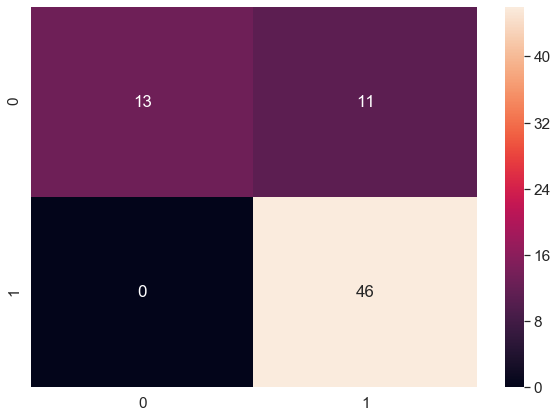

In [69]:
Confusion_matrix = confusion_matrix(y_test, predictions) 
dataframe_Confusion_matrix = pd.DataFrame(Confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(dataframe_Confusion_matrix, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predictions))

# Deep Learning Algorithm (Convolutional Neural Network)

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [73]:
X_train.shape, X_test.shape

((276, 5), (70, 5))

In [74]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [75]:
X_train.shape, X_test.shape

((276, 5, 1), (70, 5, 1))

In [76]:
epochs=10
model=Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 4, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0

In [78]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [79]:
history_model=model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 276 samples, validate on 70 samples
Epoch 1/10
276/276 [==============================] - 3s 11ms/sample - loss: 1.0660 - acc: 0.4964 - val_loss: 0.6812 - val_acc: 0.4286
Epoch 2/10
276/276 [==============================] - 0s 601us/sample - loss: 1.0542 - acc: 0.4819 - val_loss: 0.6747 - val_acc: 0.4857
Epoch 3/10
276/276 [==============================] - 0s 377us/sample - loss: 0.9798 - acc: 0.5000 - val_loss: 0.6689 - val_acc: 0.5000
Epoch 4/10
276/276 [==============================] - 0s 409us/sample - loss: 0.9618 - acc: 0.5254 - val_loss: 0.6636 - val_acc: 0.7143
Epoch 5/10
276/276 [==============================] - 0s 398us/sample - loss: 1.0036 - acc: 0.5399 - val_loss: 0.6586 - val_acc: 0.8000
Epoch 6/10
276/276 [==============================] - 0s 409us/sample - loss: 0.9266 - acc: 0.5507 - val_loss: 0.6538 - val_acc: 0.8143
Epoch 7/10
276/276 [==============================] - 0s 380us/sample - loss: 0.8864 - acc: 0.5725 - val_loss: 0.6490 - val_acc: 0.8286
Epoc

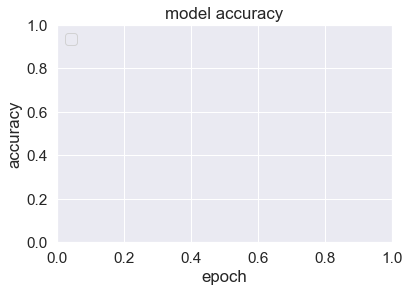

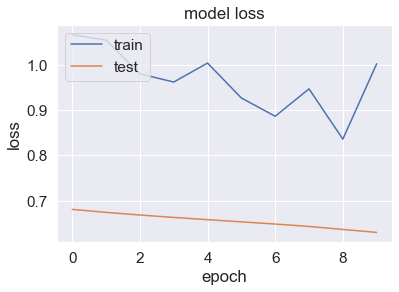

In [80]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [81]:
score = model.evaluate(X_test, y_test)
score


70/70 [==============================] - 0s 200us/sample - loss: 0.6305 - acc: 0.8429


[0.6305316090583801, 0.8428571]

In [83]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test, predictions)
Confusion_matrix

array([[13, 11],
       [ 0, 46]], dtype=int64)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        24
           1       0.81      1.00      0.89        46

    accuracy                           0.84        70
   macro avg       0.90      0.77      0.80        70
weighted avg       0.87      0.84      0.83        70



Test Data Accuracy: 0.8429


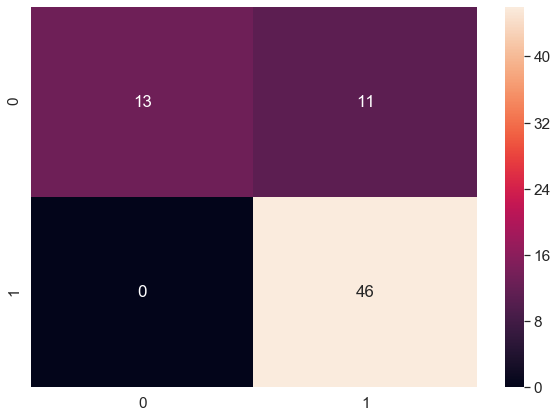

In [85]:
Confusion_matrix = confusion_matrix(y_test, predictions) 
dataframe_Confusion_matrix = pd.DataFrame(Confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(dataframe_Confusion_matrix, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predictions))